In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df = df.rename({'v1':'target','v2':'text'}, axis = 1)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
le = LabelEncoder()
df['target'] = le.fit_transform(df.target)

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# drop duplicate values
df = df.drop_duplicates(keep=False)

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [15]:
# check for duplicate values after dropping duplicate rows
df.duplicated().sum()

0

In [16]:
df.shape

(4888, 2)

## Exploratory Data Analysis (EDA)

In [17]:
df.target.value_counts()

0    4322
1     566
Name: target, dtype: int64

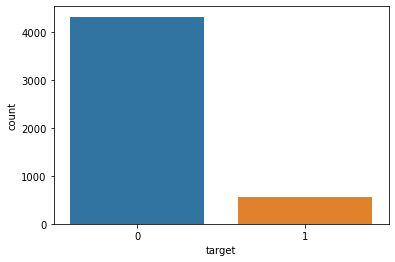

In [18]:
sns.countplot(x = df.target)
plt.show()

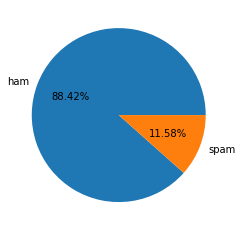

In [19]:
plt.pie(df.target.value_counts(), labels = ['ham','spam'], autopct='%0.2f%%')
plt.show()

Data is imbalanced

In [20]:
df['num_char'] = df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148


In [21]:
# number of words
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39


In [22]:
# number of sentences
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4


In [23]:
df.describe()

,target,num_char,num_word,num_sentence
count,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.115794,77.338380,18.111293,1.925736
std,0.320010,56.812841,12.930497,1.372808
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,59.000000,14.000000,1.000000
75%,0.000000,112.000000,25.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [24]:
# ham messages
df[df['target']==0].describe()

,target,num_char,num_word,num_sentence
count,4322.0,4322.000000,4322.00000,4322.000000
mean,0.0,69.559926,16.89727,1.797779
std,0.0,54.776039,13.02548,1.313880
min,0.0,3.000000,1.00000,1.000000
25%,0.0,34.000000,8.00000,1.000000
50%,0.0,52.000000,13.00000,1.000000
75%,0.0,88.000000,22.00000,2.000000
max,0.0,910.000000,220.00000,38.000000


In [25]:
# spam messages
df[df['target']==1].describe()

,target,num_char,num_word,num_sentence
count,566.0,566.000000,566.000000,566.000000
mean,1.0,136.734982,27.381625,2.902827
std,0.0,31.218620,7.160557,1.420243
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,7.000000


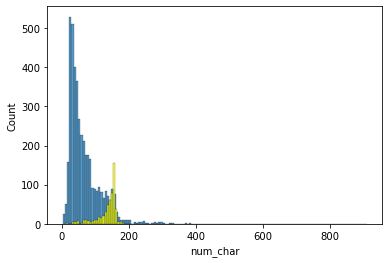

In [26]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='yellow')
plt.show()

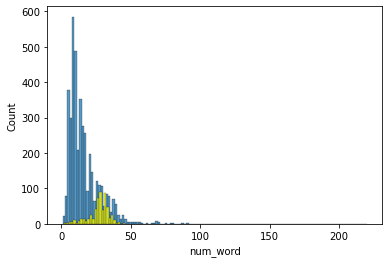

In [27]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='yellow')
plt.show()

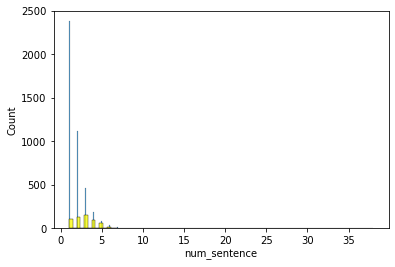

In [28]:
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'],color='yellow')
plt.show()

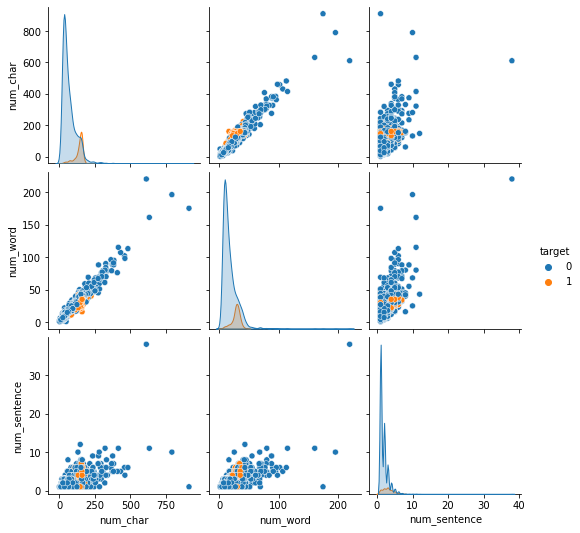

In [29]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

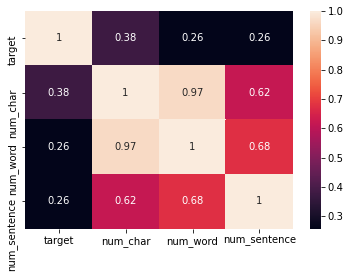

In [30]:
sns.heatmap(df.corr(),annot=True)

There is multicollinearity, hence only num_char should be included in building the model

## Data Preprocessing

- Lower case
- Tokenization
- removing special characters
- removing stop words and punctuation
- stemming

In [47]:
ps = PorterStemmer()

In [53]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english'):
                y.append(ps.stem(i))
    
    return ' '.join(y)

In [56]:
transform(df.text.loc[0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [57]:
df['transformed_text'] = df.text.apply(transform)

In [58]:
df.head()

,target,text,num_char,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...


In [75]:
wc = WordCloud(width=500, height=500,background_color='white', mode='RGBA')

In [76]:
wc_spam = wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=' '))

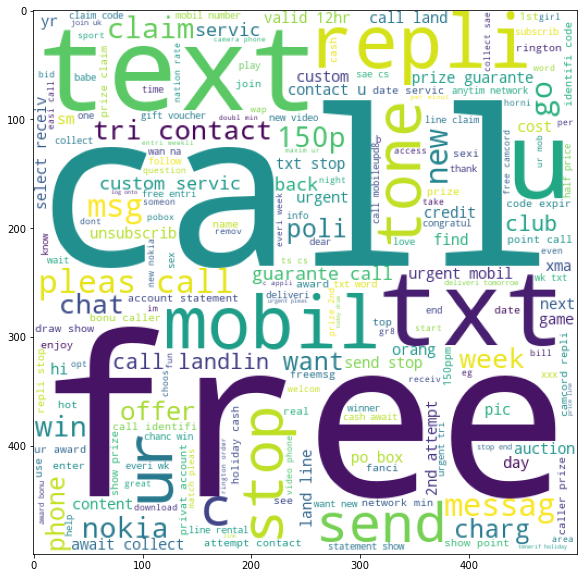

In [77]:
plt.figure(figsize=(10,10))
plt.imshow(wc_spam)

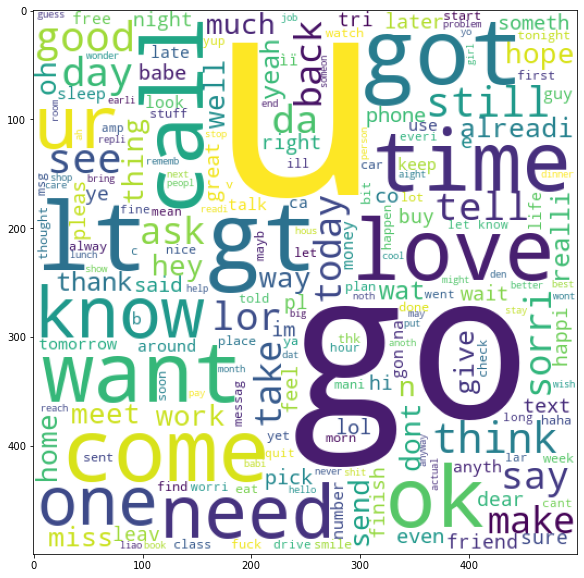

In [79]:
wc_ham = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wc_ham)

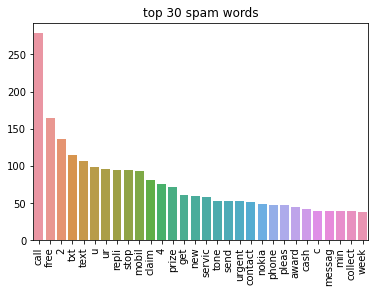

In [107]:
words_spam = df[df.target==1]['transformed_text'].str.cat(sep=' ')
word_corpus_spam = [i for i in words_spam.split(' ')]
sns.barplot(x=pd.Series(word_corpus_spam).value_counts(sort='ascending').head(30).index, y=pd.Series(word_corpus_spam).value_counts(sort='ascending').head(30).values)
plt.xticks(rotation='vertical')
plt.title("top 30 spam words")
plt.show()

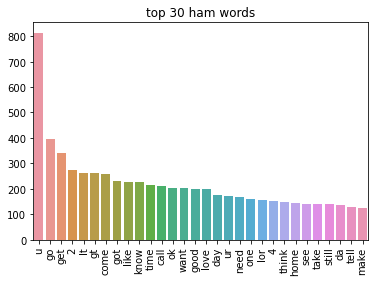

In [106]:
words_ham = df[df.target==0]['transformed_text'].str.cat(sep=' ')
word_corpus_ham = [i for i in words_ham.split(' ')]
sns.barplot(x=pd.Series(word_corpus_ham).value_counts(sort='ascending').head(30).index, y=pd.Series(word_corpus_ham).value_counts(sort='ascending').head(30).values)
plt.xticks(rotation='vertical')
plt.title("top 30 ham words")
plt.show()

## Model Building 

Textual data needs to be transformed into vectors.

### Bag of words

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [115]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [118]:
X.shape

(4888, 6355)

In [120]:
y = df['target'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_gnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_gnb)}")
confusion_matrix(y_test,y_pred_gnb)

precision score: 0.43617021276595747
accuracy score: 0.8742331288343558


array([[773, 106],
       [ 17,  82]], dtype=int64)

In [130]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_mnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_mnb)}")
confusion_matrix(y_test,y_pred_mnb)

precision score: 0.8715596330275229
accuracy score: 0.9815950920245399


array([[865,  14],
       [  4,  95]], dtype=int64)

In [131]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_bnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_bnb)}")
confusion_matrix(y_test,y_pred_bnb)

precision score: 0.975609756097561
accuracy score: 0.9785276073619632


array([[877,   2],
       [ 19,  80]], dtype=int64)

### TF-IDF

In [307]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_tfidf.shape

(4888, 6355)

In [303]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_gnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_gnb)}")
confusion_matrix(y_test,y_pred_gnb)

precision score: 0.4782608695652174
accuracy score: 0.8824130879345603


array([[775,  96],
       [ 19,  88]], dtype=int64)

In [304]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_mnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_mnb)}")
confusion_matrix(y_test,y_pred_mnb)

precision score: 1.0
accuracy score: 0.9601226993865031


array([[871,   0],
       [ 39,  68]], dtype=int64)

In [305]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(f"precision score: {precision_score(y_test,y_pred_bnb)}")
print(f"accuracy score: {accuracy_score(y_test,y_pred_bnb)}")
confusion_matrix(y_test,y_pred_bnb)

precision score: 0.9534883720930233
accuracy score: 0.9703476482617587


array([[867,   4],
       [ 25,  82]], dtype=int64)

In [308]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(precision_score(y_test, y_pred_rfc))
print(accuracy_score(y_test, y_pred_rfc))
confusion_matrix(y_test,y_pred_rfc)

1.0
0.9775051124744376


array([[880,   0],
       [ 22,  76]], dtype=int64)

## Other classification models  

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [202]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
bag = BaggingClassifier()
gb = GradientBoostingClassifier()
et = ExtraTreesClassifier()
hgb = HistGradientBoostingClassifier()
svm = SVC()

In [149]:
def model_training(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, precision

In [203]:
models = {
    "LR":lr,
    "KNN":knn,
    "DT":dt,
    "RF":rf,
    "AB":ab,
    "BAG":bag,
    "GB":gb,
    "ET":et,
    "HGB":hgb,
    "SVM":svm
}

In [204]:
dm = pd.DataFrame({"model": models})
dm

,model
AB,AdaBoostClassifier()
BAG,BaggingClassifier()
DT,DecisionTreeClassifier()
ET,ExtraTreesClassifier()
GB,GradientBoostingClassifier()
HGB,HistGradientBoostingClassifier()
KNN,KNeighborsClassifier()
LR,LogisticRegression()
RF,RandomForestClassifier()
SVM,SVC()


In [206]:
acc, pre = [], []
for i in dm['model']:
    accuracy, precision = model_training(i)
    acc.append(accuracy)
    pre.append(precision)

In [207]:
acc

[0.9652351738241309,
 0.967280163599182,
 0.9498977505112475,
 0.9795501022494888,
 0.9723926380368099,
 0.983640081799591,
 0.9263803680981595,
 0.9621676891615542,
 0.9815950920245399,
 0.9785276073619632]

In [208]:
pre

[0.9012345679012346,
 0.8764044943820225,
 0.7450980392156863,
 1.0,
 0.95,
 0.9368421052631579,
 1.0,
 0.984375,
 1.0,
 1.0]

In [209]:
dm['precision'] = pre
dm['accuracy'] = acc

In [210]:
dm


,model,precision,accuracy
AB,"(DecisionTreeClassifier(max_depth=1, random_st...",0.901235,0.965235
BAG,(DecisionTreeClassifier(random_state=113948405...,0.876404,0.967280
DT,DecisionTreeClassifier(),0.745098,0.949898
ET,"(ExtraTreeClassifier(random_state=713152090), ...",1.000000,0.979550
GB,([DecisionTreeRegressor(criterion='friedman_ms...,0.950000,0.972393
HGB,HistGradientBoostingClassifier(),0.936842,0.983640
KNN,KNeighborsClassifier(),1.000000,0.926380
LR,LogisticRegression(),0.984375,0.962168
RF,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.981595
SVM,SVC(),1.000000,0.978528


In [228]:
dm = dm.sort_values(by='precision', ascending=False)
dm

,model,precision,accuracy
ET,"(ExtraTreeClassifier(random_state=713152090), ...",1.000000,0.979550
KNN,KNeighborsClassifier(),1.000000,0.926380
RF,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.981595
SVM,SVC(),1.000000,0.978528
LR,LogisticRegression(),0.984375,0.962168
GB,([DecisionTreeRegressor(criterion='friedman_ms...,0.950000,0.972393
HGB,HistGradientBoostingClassifier(),0.936842,0.983640
AB,"(DecisionTreeClassifier(max_depth=1, random_st...",0.901235,0.965235
BAG,(DecisionTreeClassifier(random_state=113948405...,0.876404,0.967280
DT,DecisionTreeClassifier(),0.745098,0.949898


In [234]:
dm = dm.append({'model':mnb,'precision':1.0, 'accuracy':0.9693251533742331}, ignore_index=True)

In [235]:
dm = dm.sort_values(by='precision', ascending=False)
dm

,model,precision,accuracy
0,"(ExtraTreeClassifier(random_state=713152090), ...",1.000000,0.979550
1,KNeighborsClassifier(),1.000000,0.926380
2,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.981595
3,SVC(),1.000000,0.978528
10,MultinomialNB(),1.000000,0.969325
4,LogisticRegression(),0.984375,0.962168
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.950000,0.972393
6,HistGradientBoostingClassifier(),0.936842,0.983640
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.901235,0.965235
8,(DecisionTreeClassifier(random_state=113948405...,0.876404,0.967280


In [241]:
rfc = dm[dm.precision==1].sort_values(by='accuracy', ascending=False).iloc[0].model

In [258]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(precision_score(y_test, y_pred_rfc))
print(accuracy_score(y_test, y_pred_rfc))

1.0
0.9805725971370143


In [309]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))